In [1]:
import math
import sys
sys.path.append('../../../')
from pprint import pprint
import time
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pickle
seed = 42
np.random.seed(seed)

In [2]:
# analyticalResult = sin^2(θ)
# θ = arcsin(sqrt(analyticalResult))
b_max = 1 / 2  # upper limit of integral # 5
nbit = 10  # change this value to get discretized result closer to analytical results # 3

analyticResult = (b_max / 2.0 - math.sin(2 * b_max) / 4.0 ) / b_max  # the target integral can be analytically solved
print("Analytical Result:", analyticResult)

ndiv = 2 ** nbit  #number of discretization 
discretizedResult = 0.0
for i in range(ndiv):
    discretizedResult += math.sin(b_max / ndiv * (i + 0.5)) ** 2
discretizedResult = discretizedResult / ndiv
print("Discretized Result:", discretizedResult)

print("theoretical theta: ", np.arcsin(np.sqrt(analyticResult)))

Analytical Result: 0.07926450759605175
Discretized Result: 0.07926449087752495
theoretical theta:  0.2853981633974483


In [3]:
from lib_grover import *

In [4]:
#setting the number of shots and Grover operators.
max_iter = 10
number_grover_list = [1, 2, 4, 8, 16, 32, 64]  # list of number of Grover operators
shots = 100
shots_list = [shots] * len(number_grover_list) # list of number of shots
if len(shots_list) != len(number_grover_list):
    raise Exception('The length of shots_list should be equal to the length eof number_grover_list.')

# Load Data

In [5]:
with open("pkls/ignis_info_list_list.pkl", "rb") as f:
    ignis_info_list_list = pickle.load(f)
with open("pkls/lnp_info_list_list.pkl", "rb") as f:
    lnp_info_list_list = pickle.load(f)
with open("pkls/delta_info_list_list.pkl", "rb") as f:
    delta_info_list_list = pickle.load(f)
with open("pkls/mooney001_info_list_list.pkl", "rb") as f:
    mooney001_info_list_list = pickle.load(f)
with open("pkls/mthree_lu_info_list_list.pkl", "rb") as f:
    mthree_lu_info_list_list = pickle.load(f)

In [6]:
with open("pkls/raw_hit_list_list.pkl", "rb") as f:
    raw_hit_list_list = pickle.load(f)
with open("pkls/ignis_hit_list_list.pkl", "rb") as f:
    ignis_hit_list_list = pickle.load(f)
with open("pkls/lnp_hit_list_list.pkl", "rb") as f:
    lnp_hit_list_list = pickle.load(f)
with open("pkls/delta_hit_list_list.pkl", "rb") as f:
    delta_hit_list_list = pickle.load(f)
with open("pkls/mooney001_hit_list_list.pkl", "rb") as f:
    mooney001_hit_list_list = pickle.load(f)
with open("pkls/mthree_lu_hit_list_list.pkl", "rb") as f:
    mthree_lu_hit_list_list = pickle.load(f)

In [7]:
mean_raw_hit_list = np.mean(np.asarray(raw_hit_list_list), axis=0)
stddev_raw_hit_list = np.std(np.asarray(raw_hit_list_list), axis=0)
mean_ignis_hit_list = np.mean(np.asarray(ignis_hit_list_list), axis=0)
stddev_ignis_hit_list = np.std(np.asarray(ignis_hit_list_list), axis=0)
mean_delta_hit_list = np.mean(np.asarray(delta_hit_list_list), axis=0)
stddev_delta_hit_list = np.std(np.asarray(delta_hit_list_list), axis=0)
mean_lnp_hit_list = np.mean(np.asarray(lnp_hit_list_list), axis=0)
stddev_lnp_hit_list = np.std(np.asarray(lnp_hit_list_list), axis=0)
mean_mooney001_hit_list = np.mean(np.asarray(mooney001_hit_list_list), axis=0)
stddev_mooney001_hit_list = np.std(np.asarray(mooney001_hit_list_list), axis=0)
mean_mthree_lu_hit_list = np.mean(np.asarray(mthree_lu_hit_list_list) * shots, axis=0)
stddev_mthree_lu_hit_list = np.std(np.asarray(mthree_lu_hit_list_list) * shots, axis=0)

In [8]:
pprint(mean_raw_hit_list)
pprint(mean_ignis_hit_list)
pprint(mean_delta_hit_list)
pprint(mean_lnp_hit_list)
pprint(mean_mooney001_hit_list)
pprint(mean_mthree_lu_hit_list)

array([66.4, 16.7, 39.5,  3.7, 82.4, 63.6, 14.8])
array([73.2592782 , 17.57831047, 43.0745348 ,  2.92602986, 91.1551898 ,
       70.20117691, 15.41255024])
array([73.96062672, 18.01408694, 43.68412893,  3.37997411, 91.98468467,
       70.79489189, 15.88887205])
array([73.27031882, 17.57524517, 43.07467639,  2.93137974, 91.1532237 ,
       70.20330581, 15.41893449])
array([74.04266425, 18.08425262, 43.76303144,  0.        , 92.07745268,
       70.88947865, 15.45934004])
array([70.06776747, 16.85458786, 41.28083831,  3.13962505, 87.87268496,
       67.45030414, 14.83919666])


# Plot Mean Values of the Population of All-zero State

Text(0, 0.5, 'population of $|00...0\\rangle$')

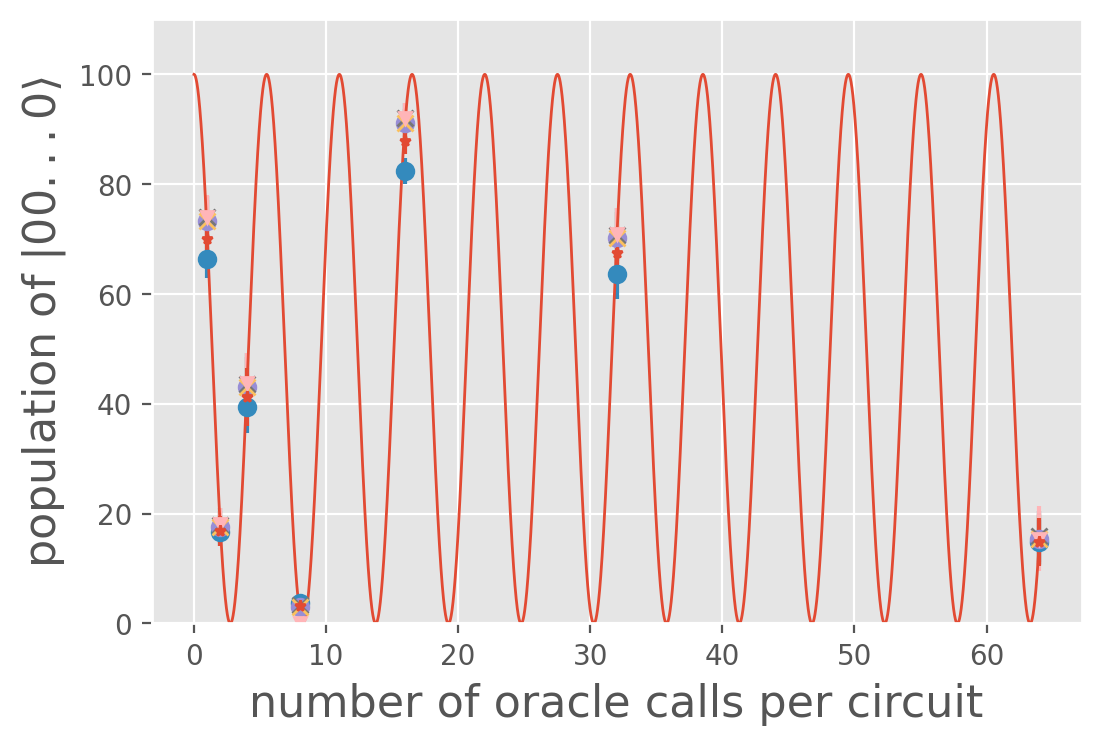

In [9]:
divide = 10000
plt.figure(dpi=200)
plt.plot(np.linspace(0,number_grover_list[-1], divide), 
         shots * np.cos(2 * np.linspace(0,number_grover_list[-1], divide) * np.arcsin(np.sqrt(discretizedResult))) ** 2, 
         label="theoretical curve", color="C0", lw=1)
plt.errorbar(number_grover_list, mean_raw_hit_list, stddev_raw_hit_list, linestyle='None', marker="o", label="raw results", color="C1", markersize=6)
plt.errorbar(number_grover_list, mean_ignis_hit_list, stddev_ignis_hit_list, linestyle='None', marker="o", label="rigorous tensored", color="C2", markersize=6)
plt.errorbar(number_grover_list, mean_delta_hit_list, stddev_delta_hit_list, linestyle='None',  marker="x", label="proposed (delta)", color="C3", markersize=6)
plt.errorbar(number_grover_list, mean_lnp_hit_list, stddev_lnp_hit_list, linestyle='None',  marker="x", label="proposed (least norm)", color="C4", markersize=6)
# plt.errorbar(number_grover_list, mean_mooney01_hit_list, stddev_mooney01_hit_list, linestyle='None',  marker="v", label="Mooney et al. (threshold = 0.1)", color="C5", markersize=4)
plt.errorbar(number_grover_list, mean_mooney001_hit_list, stddev_mooney001_hit_list, linestyle='None', marker="v", label="Mooney et al. (t = 0.01)", color="C6", markersize=4)
# plt.errorbar(number_grover_list, mean_nation_lu_hit_list, stddev_nation_lu_hit_list, linestyle='None', marker="^", label="Nation et al. (lu)", color="C7", markersize=4)
# plt.errorbar(number_grover_list, mean_nation_bicgstab_hit_list, stddev_nation_bicgstab_hit_list, linestyle='None', marker="^", label="Nation et al. (bicgstab)", color="C8", markersize=4)
plt.errorbar(number_grover_list, mean_mthree_lu_hit_list, stddev_mthree_lu_hit_list, linestyle='None', marker="*", label="mthree (lu)", color="C7", markersize=4)
# plt.errorbar(number_grover_list, mean_mthree_gmres_hit_list, stddev_mthree_gmres_hit_list, linestyle='None', marker="*", label="mthree (gmres)", color="C8", markersize=2)
# plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0, fontsize=14)
plt.ylim(0, 110)
# plt.title(r"10-qubit, $b_{max}=1/2$, 100 shots, $p(0|1)=p(1|0)=0.01$")
plt.xlabel(r"number of oracle calls per circuit", fontsize=16)
plt.ylabel(r"population of $|00...0\rangle$", fontsize=16)

# Create Theta Candidate List for each attempt

`thetaCandidate_*_list_list` is a 2d list.

In [106]:
print("raw")
thetaCandidate_raw_list_list = []
for iter_count, raw_hit_list in enumerate(raw_hit_list_list):
    thetaCandidate_raw_list_list.append( calculate_theta(raw_hit_list, number_grover_list, shots_list) )
    print("iter", iter_count + 1, "finished")
print("ignis")
thetaCandidate_ignis_list_list = []
for iter_count, ignis_hit_list in enumerate(ignis_hit_list_list):
    thetaCandidate_ignis_list_list.append( calculate_theta(ignis_hit_list, number_grover_list, shots_list) )
    print("iter", iter_count + 1, "finished")
print("delta")
thetaCandidate_delta_list_list = []
for iter_count, delta_hit_list in enumerate(delta_hit_list_list):
    thetaCandidate_delta_list_list.append( calculate_theta(delta_hit_list, number_grover_list, shots_list) )
    print("iter", iter_count + 1, "finished")
print("lnp")
thetaCandidate_lnp_list_list = []
for iter_count, lnp_hit_list in enumerate(lnp_hit_list_list):
    thetaCandidate_lnp_list_list.append( calculate_theta(lnp_hit_list, number_grover_list, shots_list) )
    print("iter", iter_count + 1, "finished")
print("mooney")
thetaCandidate_mooney001_list_list = []
for iter_count, mooney001_hit_list in enumerate(mooney001_hit_list_list):
    thetaCandidate_mooney001_list_list.append( calculate_theta(mooney001_hit_list, number_grover_list, shots_list) )
    print("iter", iter_count + 1, "finished")
print("mthree")
thetaCandidate_mthree_lu_list_list = []
for iter_count, mthree_lu_hit_list in enumerate(mthree_lu_hit_list_list):
    thetaCandidate_mthree_lu_list_list.append( calculate_theta(mthree_lu_hit_list, number_grover_list, shots_list) )
    print("iter", iter_count + 1, "finished")

raw
iter 1 finished
iter 2 finished
iter 3 finished
iter 4 finished
iter 5 finished
iter 6 finished
iter 7 finished
iter 8 finished
iter 9 finished
iter 10 finished
ignis
iter 1 finished
iter 2 finished
iter 3 finished
iter 4 finished
iter 5 finished
iter 6 finished
iter 7 finished
iter 8 finished
iter 9 finished
iter 10 finished
delta
iter 1 finished
iter 2 finished
iter 3 finished
iter 4 finished
iter 5 finished
iter 6 finished
iter 7 finished
iter 8 finished
iter 9 finished
iter 10 finished
lnp
iter 1 finished
iter 2 finished
iter 3 finished
iter 4 finished
iter 5 finished
iter 6 finished
iter 7 finished
iter 8 finished
iter 9 finished
iter 10 finished
mooney
iter 1 finished
iter 2 finished
iter 3 finished
iter 4 finished
iter 5 finished
iter 6 finished
iter 7 finished
iter 8 finished
iter 9 finished
iter 10 finished
mthree
iter 1 finished
iter 2 finished
iter 3 finished
iter 4 finished
iter 5 finished
iter 6 finished
iter 7 finished
iter 8 finished
iter 9 finished
iter 10 finished


In [109]:
from scipy import optimize
def calculate_theta(hit_list, number_grover_list, shots_list):
    """
        calculate optimal theta values
            hit_list: list of count of obserbving "1" for qc_list
            numebr_grover_list: list of number of Grover operators        
            shots_list: list of number of shots

        Return:
            thetaCandidate_list: list of optimal theta
    """

    small = 1.e-15  # small valued parameter to avoid zero division
    confidenceLevel = 5  # confidence level to determine the search range

    thetaCandidate_list = []
    rangeMin = 0.0 + small
    rangeMax = 0.5 - small
    for igrover in range(len(number_grover_list)):

        def loglikelihood(p):
            ret = np.zeros_like(p)
            theta = np.arcsin(np.sqrt(p))
            for n in range(igrover + 1): # accumulate all the counts from 1,2,4, ... to the index of igrover
                ihit = hit_list[n]
                arg = (2 * number_grover_list[n]) * theta
                ret = ret + 2 * ihit * np.log(np.abs(np.cos(arg))) \
                          + 2 * (shots_list[n] - ihit) * np.log(np.abs(np.sin(arg)))
            return -ret

        searchRange = (rangeMin, rangeMax)
        searchResult = optimize.brute(loglikelihood, [searchRange], Ns=256)
        pCandidate = searchResult[0]
        thetaCandidate_list.append(np.arcsin(np.sqrt(pCandidate)))
        perror = CalcErrorCramérRao(igrover, shots_list, pCandidate, number_grover_list)
        print(pCandidate)
        # rangeMin = max(pCandidate-confidenceLevel*perror, 0.0 + small)
        # rangeMax = min(pCandidate+confidenceLevel*perror, 0.5 - small)
        # print(rangeMin, rangeMax, " == ", np.arcsin(np.sqrt(rangeMin)), np.arcsin(np.sqrt(rangeMax)))
    return thetaCandidate_list

In [110]:
from scipy import optimize
def calculate_theta_direct(hit_list, number_grover_list, shots_list):
    """
        calculate optimal theta values
            hit_list: list of count of obserbving "1" for qc_list
            numebr_grover_list: list of number of Grover operators        
            shots_list: list of number of shots

        Return:
            thetaCandidate_list: list of optimal theta
    """

    small = 1.e-15  # small valued parameter to avoid zero division
    confidenceLevel = 100  # confidence level to determine the search range

    thetaCandidate_list = []
    rangeMin = 0.0 + small
    rangeMax = np.pi - small
    for igrover in range(len(number_grover_list)):

        def loglikelihood(theta):
            ret = np.zeros_like(theta)
            # theta = np.arcsin(np.sqrt(p))
            for n in range(igrover + 1): # accumulate all the counts from 1,2,4, ... to the index of igrover
                ihit = hit_list[n]
                arg = (2 * number_grover_list[n]) * theta
                ret = ret + 2 * ihit * np.log(np.abs(np.cos(arg))) \
                          + 2 * (shots_list[n] - ihit) * np.log(np.abs(np.sin(arg)))
            return -ret

        searchRange = (rangeMin, rangeMax)
        searchResult = optimize.brute(loglikelihood, [searchRange], Ns=256)
        thetaCandidate = searchResult[0]
        thetaCandidate_list.append(thetaCandidate)
        pCandidate = np.sin(thetaCandidate) ** 2
        perror = CalcErrorCramérRao(igrover, shots_list, pCandidate, number_grover_list)
        print(pCandidate)
        # print(perror)
        # rangeMin = max(thetaCandidate-confidenceLevel*perror, 0.0 + small)
        # rangeMax = min(thetaCandidate+confidenceLevel*perror, np.pi - small)
        # print(rangeMin, rangeMax)
    return thetaCandidate_list

In [27]:
def loglikelihood(p, igrover, hit_list, number_grover_list):
    ret = np.zeros_like(p)
    theta = np.arcsin(np.sqrt(p))
    for n in range(igrover + 1): # accumulate all the counts from 1,2,4, ... to the index of igrover
        ihit = hit_list[n]
        arg = (2 * number_grover_list[n]) * theta
        ret = ret + 2 * ihit * np.log(np.abs(np.cos(arg))) \
                  + 2 * (shots_list[n] - ihit) * np.log(np.abs(np.sin(arg)))
    return -ret

In [54]:
np.linspace(0.0 + 1.e-15, 0.5 - 1.e-15, 100)[np.argmin([loglikelihood(p, 5, mthree_lu_hit_list_list[4], number_grover_list) for p in np.linspace(0.0 + 1.e-15, 0.5 - 1.e-15, 100)])]

0.2474747474747475

[66.99652311 15.01007927 41.25252986  1.40352363 88.86175448 64.03362039
 12.77148972]


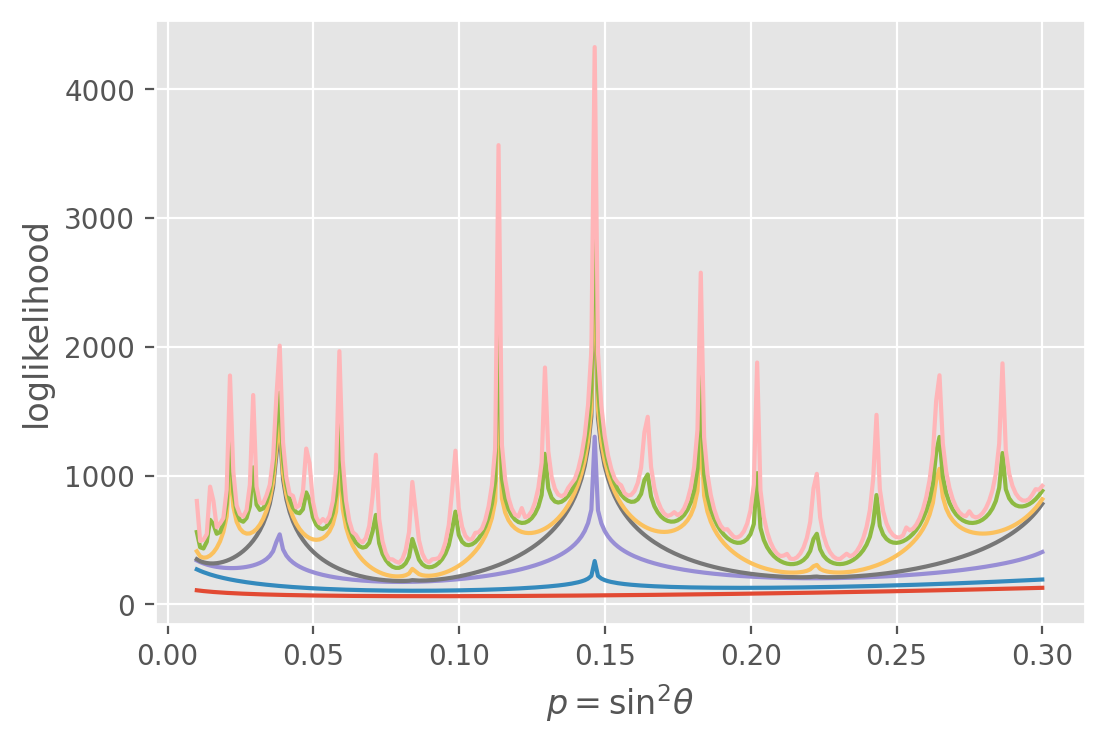

In [147]:
print(np.array(mthree_lu_hit_list_list[4]) * shots)
plt.figure(dpi=200)
plt.xlabel(r"$p=\sin^2{\theta}$")
plt.ylabel(r"loglikelihood")
for igrover in range(len(number_grover_list)):
    plt.plot(np.linspace(0.01 + 1.e-15, 0.3 - 1.e-15, 256), [loglikelihood(p, igrover, np.array(mthree_lu_hit_list_list[4]) * shots, number_grover_list) for p in np.linspace(0.01 + 1.e-15, 0.3 - 1.e-15, 256)])

[70.31298828721813, 15.550439961621482, 43.57183202116377, 0.9944100194856021, 92.12569875220535, 66.14705777739529, 13.198957830905265]


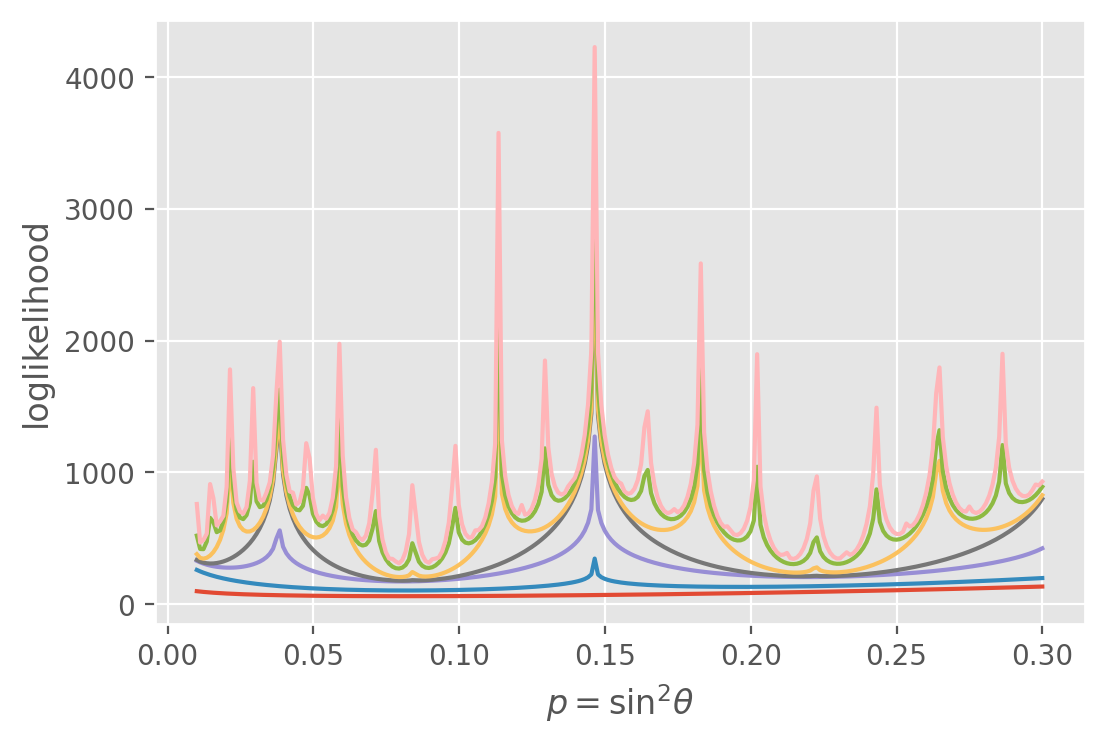

In [145]:
print(ignis_hit_list_list[4])
plt.figure(dpi=200)
plt.xlabel(r"$p=\sin^2{\theta}$")
plt.ylabel(r"loglikelihood")
for igrover in range(len(number_grover_list)):
    plt.plot(np.linspace(0.01 + 1.e-15, 0.3 - 1.e-15, 256), [loglikelihood(p, igrover, ignis_hit_list_list[4], number_grover_list) for p in np.linspace(0.01 + 1.e-15, 0.3 - 1.e-15, 256)])

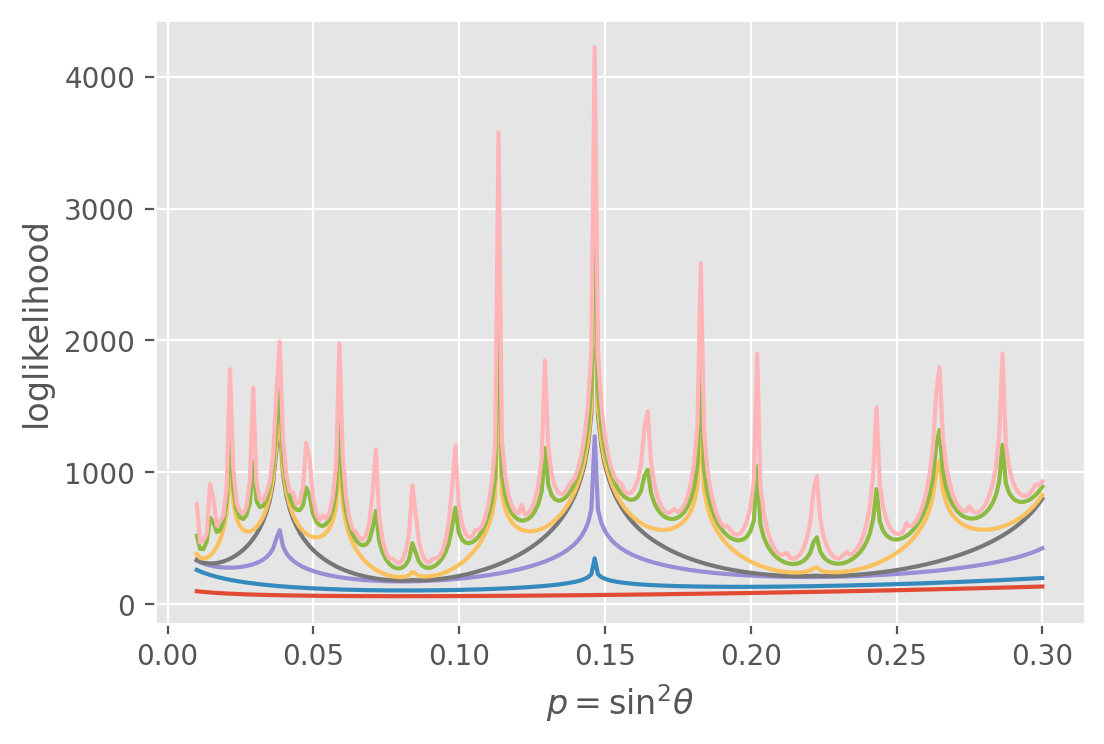

In [142]:
print(lnp_hit_list_list[4])
plt.figure(dpi=200)
plt.xlabel(r"$p=\sin^2{\theta}$")
plt.ylabel(r"loglikelihood")
for igrover in range(len(number_grover_list)):
    plt.plot(np.linspace(0.01 + 1.e-15, 0.3 - 1.e-15, 256), [loglikelihood(p, igrover, lnp_hit_list_list[4], number_grover_list) for p in np.linspace(0.01 + 1.e-15, 0.3 - 1.e-15, 256)])

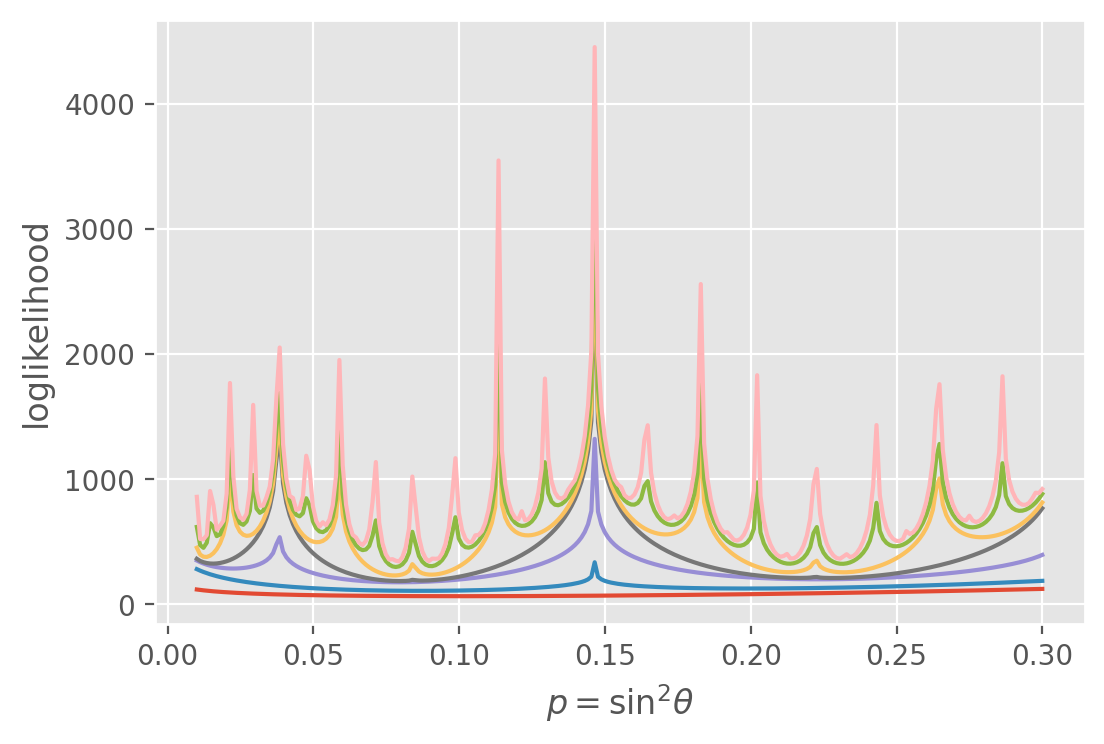

In [143]:
print(raw_hit_list_list[4])
plt.figure(dpi=200)
plt.xlabel(r"$p=\sin^2{\theta}$")
plt.ylabel(r"loglikelihood")
for igrover in range(len(number_grover_list)):
    plt.plot(np.linspace(0.01 + 1.e-15, 0.3 - 1.e-15, 256), [loglikelihood(p, igrover, raw_hit_list_list[4], number_grover_list) for p in np.linspace(0.01 + 1.e-15, 0.3 - 1.e-15, 256)])

In [116]:
print("mthree")
thetaCandidate_mthree_lu_list_list = []
for iter_count, mthree_lu_hit_list in enumerate(mthree_lu_hit_list_list):
    thetaCandidate_mthree_lu_list_list.append( calculate_theta(mthree_lu_hit_list, number_grover_list, shots_list) )
    print("iter", iter_count + 1, "finished")

mthree
0.4587339154411756
0.21102022058823547
0.2781050857843136
0.23818167892156866
0.25595971200980394
0.24704676011029414
0.2515686274509804
iter 1 finished
0.4601543351715678
0.21110294117647077
0.2779419424019607
0.23818167892156866
0.25590954350490197
0.24701056985294118
0.25155024509803925
iter 2 finished
0.4574873621323521
0.2107720588235296
0.27821384803921556
0.23818167892156866
0.25590954350490197
0.24704676011029414
0.2515625
iter 3 finished
0.4578377757352933
0.21110294117647077
0.27783318014705877
0.23818167892156866
0.25590954350490197
0.2470226332720588
0.2515625
iter 4 finished
0.45909237132352854
0.21102022058823547
0.27805070465686266
0.23818167892156866
0.25590954350490197
0.2470226332720588
0.2515686274509804
iter 5 finished
0.45810661764705796
0.21093750000000017
0.2781050857843136
0.2382280177696079
0.25590954350490197
0.24705882352941178
0.25155637254901964
iter 6 finished
0.4574873621323521
0.21110294117647077
0.2777787990196078
0.23818167892156866
0.2559095435

In [117]:
thetaCandidate_mthree_lu_list_list

[[0.7440850869281067,
  0.4772850983602098,
  0.5554864794336533,
  0.5098411484718923,
  0.5304535449594474,
  0.5201819007553891,
  0.5254081842902301],
 [0.7455102028865721,
  0.47738645622991105,
  0.5553044099419544,
  0.5098411484718923,
  0.5303960630624914,
  0.5201399443011407,
  0.5253870020377788],
 [0.742834135420953,
  0.4769809373858547,
  0.5556078408549459,
  0.5098411484718923,
  0.5303960630624914,
  0.5201819007553891,
  0.5254011235965019],
 [0.7431858120303717,
  0.47738645622991105,
  0.5551830120228678,
  0.5098411484718923,
  0.5303960630624914,
  0.5201539300153467,
  0.5254011235965019],
 [0.7444447592222985,
  0.4772850983602098,
  0.5554257932526071,
  0.5098411484718923,
  0.5303960630624914,
  0.5201539300153467,
  0.5254081842902301],
 [0.7434556087383537,
  0.4771837259365949,
  0.5554864794336533,
  0.5098955386946522,
  0.5303960630624914,
  0.5201958857812699,
  0.5253940628456857],
 [0.742834135420953,
  0.47738645622991105,
  0.5551223075812763,
  0

In [118]:
print("ignis")
thetaCandidate_ignis_list_list = []
for iter_count, ignis_hit_list in enumerate(ignis_hit_list_list):
    thetaCandidate_ignis_list_list.append( calculate_theta(ignis_hit_list, number_grover_list, shots_list) )
    print("iter", iter_count + 1, "finished")

ignis
0.08014093137254968
0.08007812500000067
0.0781250000000007
0.07979549632353009
0.07817095588235363
0.07935049019607912
0.07925857843137324
iter 1 finished
0.09294883578431437
0.08437959558823596
0.08235294117647125
0.08037645526960852
0.07995251225490263
0.07899816176470657
0.07939706839767222
iter 2 finished
0.06379595588235366
0.08352328431372615
0.07635110294117717
0.076918658088236
0.07861519607843206
0.07946576286764771
0.07941865808823595
iter 3 finished
0.07025735294117719
0.07480085784313797
0.08209558823529478
0.0775735294117654
0.07873008578431442
0.07897518382353011
0.07903645833333403
iter 4 finished
0.08070618872549087
0.0821599264705889
0.08039215686274577
0.08070618872549087
0.07969343596813794
0.07912837009803991
0.07913219975490265
iter 5 finished
0.07623161764705952
0.08114583333333401
0.07879901960784383
0.0775735294117654
0.07910539215686344
0.07954427083333399
0.07939118030024575
iter 6 finished
0.06862745098039288
0.07300245098039287
0.08355621936274577
0.08

In [119]:
thetaCandidate_ignis_list_list

[[0.2870161878277079,
  0.2869005064170188,
  0.28328216531054035,
  0.2863794267173762,
  0.28336777474711794,
  0.28555726192607445,
  0.2853871894187119],
 [0.30980729890870357,
  0.29473016555060527,
  0.29106440405331885,
  0.287449625051313,
  0.2866690192738432,
  0.2849048272236451,
  0.28564341534670457],
 [0.2553443549024287,
  0.2931862281737019,
  0.2799598202663412,
  0.28102660994333206,
  0.28419414857370734,
  0.2857704340177929,
  0.28568334090866393],
 [0.2682672221772915,
  0.27702725083570084,
  0.2905959888511041,
  0.28225304821903224,
  0.2844075180548001,
  0.2848622309850112,
  0.2849758083711352],
 [0.2880554647805195,
  0.29071315524314795,
  0.28747850024485583,
  0.2880554647805195,
  0.2861910520036199,
  0.28514609901352383,
  0.28515319249448323],
 [0.2797347701142202,
  0.28886149779579967,
  0.2845354714035426,
  0.28225304821903224,
  0.2851035348323049,
  0.28591553680710785,
  0.28563252569626557],
 [0.2650612877419957,
  0.27359000984708964,
  0.29

In [120]:
print("lnp")
thetaCandidate_lnp_list_list = []
for iter_count, lnp_hit_list in enumerate(lnp_hit_list_list):
    thetaCandidate_lnp_list_list.append( calculate_theta(lnp_hit_list, number_grover_list, shots_list) )
    print("iter", iter_count + 1, "finished")

lnp
0.08014093137254968
0.08007812500000067
0.0781250000000007
0.07979549632353009
0.07818627450980462
0.07934283088235364
0.07925857843137324
iter 1 finished
0.09294883578431437
0.08437959558823596
0.08235294117647125
0.08039215686274577
0.07996036305147125
0.07899050245098108
0.07939903109681437
iter 2 finished
0.06379595588235366
0.083786764705883
0.07635110294117717
0.07700827205882424
0.07863051470588305
0.07946576286764771
0.07941865808823595
iter 3 finished
0.07009191176470661
0.07474264705882425
0.08209558823529478
0.0775735294117654
0.07872242647058893
0.07897518382353011
0.07904411764705951
iter 4 finished
0.08051776960784382
0.08196691176470655
0.08039215686274577
0.08058057598039284
0.07970128676470656
0.0791360294117654
0.07913794424019677
iter 5 finished
0.07629136029411834
0.08133425245098108
0.07879901960784383
0.07760416666666736
0.07910539215686344
0.07954427083333399
0.07938725490196144
iter 6 finished
0.06868106617647132
0.07300245098039287
0.08352328431372615
0.081

In [121]:
thetaCandidate_lnp_list_list

[[0.2870161878277079,
  0.2869005064170188,
  0.28328216531054035,
  0.2863794267173762,
  0.2833963061077341,
  0.28554309265627087,
  0.2853871894187119],
 [0.30980729890870357,
  0.29473016555060527,
  0.29106440405331885,
  0.28747850024485583,
  0.28668349208231236,
  0.2848906291068023,
  0.28564704514819145],
 [0.2553443549024287,
  0.293662048418653,
  0.2799598202663412,
  0.2811947201144932,
  0.2842226060731091,
  0.2857704340177929,
  0.28568334090866393],
 [0.26794338782415383,
  0.27691659349182424,
  0.2905959888511041,
  0.28225304821903224,
  0.2843932978544052,
  0.2848622309850112,
  0.2849900027139538],
 [0.2877094092231758,
  0.2903615305773225,
  0.28747850024485583,
  0.2878248020803607,
  0.2862055462761647,
  0.28516028581854747,
  0.2851638324217476],
 [0.27984731540002367,
  0.28920633088902664,
  0.2845354714035426,
  0.2823103090876581,
  0.2851035348323049,
  0.28591553680710785,
  0.2856252657243084],
 [0.2651673030803114,
  0.27359000984708964,
  0.29318

In [102]:
print("raw")
thetaCandidate_raw_list_list = []
for iter_count, raw_hit_list in enumerate(raw_hit_list_list):
    thetaCandidate_raw_list_list.append( calculate_theta_direct(raw_hit_list, number_grover_list, shots_list) )
    print("iter", iter_count + 1, "finished")
print("ignis")
thetaCandidate_ignis_list_list = []
for iter_count, ignis_hit_list in enumerate(ignis_hit_list_list):
    thetaCandidate_ignis_list_list.append( calculate_theta_direct(ignis_hit_list, number_grover_list, shots_list) )
    print("iter", iter_count + 1, "finished")
print("delta")
thetaCandidate_delta_list_list = []
for iter_count, delta_hit_list in enumerate(delta_hit_list_list):
    thetaCandidate_delta_list_list.append( calculate_theta_direct(delta_hit_list, number_grover_list, shots_list) )
    print("iter", iter_count + 1, "finished")
print("lnp")
thetaCandidate_lnp_list_list = []
for iter_count, lnp_hit_list in enumerate(lnp_hit_list_list):
    thetaCandidate_lnp_list_list.append( calculate_theta_direct(lnp_hit_list, number_grover_list, shots_list) )
    print("iter", iter_count + 1, "finished")
print("mooney")
thetaCandidate_mooney001_list_list = []
for iter_count, mooney001_hit_list in enumerate(mooney001_hit_list_list):
    thetaCandidate_mooney001_list_list.append( calculate_theta_direct(mooney001_hit_list, number_grover_list, shots_list) )
    print("iter", iter_count + 1, "finished")
print("mthree")
thetaCandidate_mthree_lu_list_list = []
for iter_count, mthree_lu_hit_list in enumerate(mthree_lu_hit_list_list):
    thetaCandidate_mthree_lu_list_list.append( calculate_theta_direct(mthree_lu_hit_list, number_grover_list, shots_list) )
    print("iter", iter_count + 1, "finished")

raw
iter 1 finished
iter 2 finished
iter 3 finished
iter 4 finished
iter 5 finished
iter 6 finished
iter 7 finished
iter 8 finished
iter 9 finished
iter 10 finished
ignis
iter 1 finished
iter 2 finished
iter 3 finished
iter 4 finished
iter 5 finished
iter 6 finished
iter 7 finished
iter 8 finished
iter 9 finished
iter 10 finished
delta
iter 1 finished
iter 2 finished
iter 3 finished
iter 4 finished
iter 5 finished
iter 6 finished
iter 7 finished
iter 8 finished
iter 9 finished
iter 10 finished
lnp
iter 1 finished
iter 2 finished
iter 3 finished
iter 4 finished
iter 5 finished
iter 6 finished
iter 7 finished
iter 8 finished
iter 9 finished
iter 10 finished
mooney
iter 1 finished
iter 2 finished
iter 3 finished
iter 4 finished
iter 5 finished
iter 6 finished
iter 7 finished
iter 8 finished
iter 9 finished
iter 10 finished
mthree
iter 1 finished
iter 2 finished
iter 3 finished
iter 4 finished
iter 5 finished
iter 6 finished
iter 7 finished
iter 8 finished
iter 9 finished
iter 10 finished


In [100]:
for i in range(max_iter):
    for j in range(len(number_grover_list)):
        if thetaCandidate_raw_list_list[i][j] < 0.2:
            thetaCandidate_raw_list_list[i][j] += np.pi / 2
        if thetaCandidate_ignis_list_list[i][j] < 2:
            thetaCandidate_ignis_list_list[i][j] += np.pi / 2
        if thetaCandidate_delta_list_list[i][j] < 2:
            thetaCandidate_delta_list_list[i][j] += np.pi / 2
        if thetaCandidate_lnp_list_list[i][j] < 2:
            thetaCandidate_lnp_list_list[i][j] += np.pi / 2
        if thetaCandidate_mooney001_list_list[i][j] < 2:
            thetaCandidate_mooney001_list_list[i][j] += np.pi / 2
        if thetaCandidate_mthree_lu_list_list[i][j] < 2:
            thetaCandidate_mthree_lu_list_list[i][j] += np.pi / 2

# Calculate the Estimation Error from the Correct Theta

In [11]:
error_raw_list = np.zeros_like(number_grover_list,dtype=float)
error_raw_list_list = [np.zeros_like(number_grover_list,dtype=float)]
for thetaCandidate_raw_list in thetaCandidate_raw_list_list:
    error_raw_list += (np.sin(thetaCandidate_raw_list)**2 - discretizedResult)**2  # list of estimation errors
    error_raw_list_list.append(np.sin(thetaCandidate_raw_list)**2 - discretizedResult)
error_raw_list = ( error_raw_list / (max_iter - 1) ) ** (1 / 2)

In [12]:
error_ignis_list = np.zeros_like(number_grover_list,dtype=float)
error_ignis_list_list = [np.zeros_like(number_grover_list,dtype=float)]
for thetaCandidate_ignis_list in thetaCandidate_ignis_list_list:
    error_ignis_list += (np.sin(thetaCandidate_ignis_list)**2 - discretizedResult)**2  # list of estimation errors
    error_ignis_list_list.append(np.sin(thetaCandidate_ignis_list)**2 - discretizedResult)
error_ignis_list = ( error_ignis_list / (max_iter - 1) ) ** (1 / 2)

In [13]:
error_delta_list = np.zeros_like(number_grover_list,dtype=float)
error_delta_list_list = [np.zeros_like(number_grover_list,dtype=float)]
for thetaCandidate_delta_list in thetaCandidate_delta_list_list:
    error_delta_list += (np.sin(thetaCandidate_delta_list)**2 - discretizedResult)**2  # list of estimation errors
    error_delta_list_list.append(np.sin(thetaCandidate_delta_list)**2 - discretizedResult)
error_delta_list = ( error_delta_list / (max_iter - 1) ) ** (1 / 2)

In [14]:
error_lnp_list = np.zeros_like(number_grover_list,dtype=float)
error_lnp_list_list = [np.zeros_like(number_grover_list,dtype=float)]
for thetaCandidate_lnp_list in thetaCandidate_lnp_list_list:
    error_lnp_list += (np.sin(thetaCandidate_lnp_list)**2 - discretizedResult)**2  # list of estimation errors
    error_lnp_list_list.append(np.sin(thetaCandidate_lnp_list)**2 - discretizedResult)
error_lnp_list = ( error_lnp_list / (max_iter - 1) ) ** (1 / 2)

In [15]:
error_mooney001_list = np.zeros_like(number_grover_list,dtype=float)
error_mooney001_list_list = [np.zeros_like(number_grover_list,dtype=float)]
for thetaCandidate_mooney001_list in thetaCandidate_mooney001_list_list:
    error_mooney001_list += (np.sin(thetaCandidate_mooney001_list)**2 - discretizedResult)**2  # list of estimation errors
    error_mooney001_list_list.append(np.sin(thetaCandidate_mooney001_list)**2 - discretizedResult)
error_mooney001_list = ( error_mooney001_list / (max_iter - 1) ) ** (1 / 2)

In [16]:
error_mthree_lu_list = np.zeros_like(number_grover_list,dtype=float)
error_mthree_lu_list_list = [np.zeros_like(number_grover_list,dtype=float)]
for thetaCandidate_mthree_lu_list in thetaCandidate_mthree_lu_list_list:
    error_mthree_lu_list += (np.sin(thetaCandidate_mthree_lu_list)**2 - discretizedResult)**2  # list of estimation errors
    error_mthree_lu_list_list.append(np.sin(thetaCandidate_mthree_lu_list)**2 - discretizedResult)
error_mthree_lu_list = ( error_mthree_lu_list / (max_iter - 1) ) ** (1 / 2)

# Theoretical Lower Bound

In [17]:
OracleCall_list = []  # list of number of oracle calls
ErrorCramérRao_list = []  # list of Cramér-Rao lower bound
for i in range(len(number_grover_list)):
    OracleCall_list.append( CalcNumberOracleCalls(i, shots_list, number_grover_list) )
    ErrorCramérRao_list.append( CalcErrorCramérRao(i, shots_list, discretizedResult, number_grover_list) )

# Plot the Averaged Estimation Error

<Figure size 432x288 with 0 Axes>

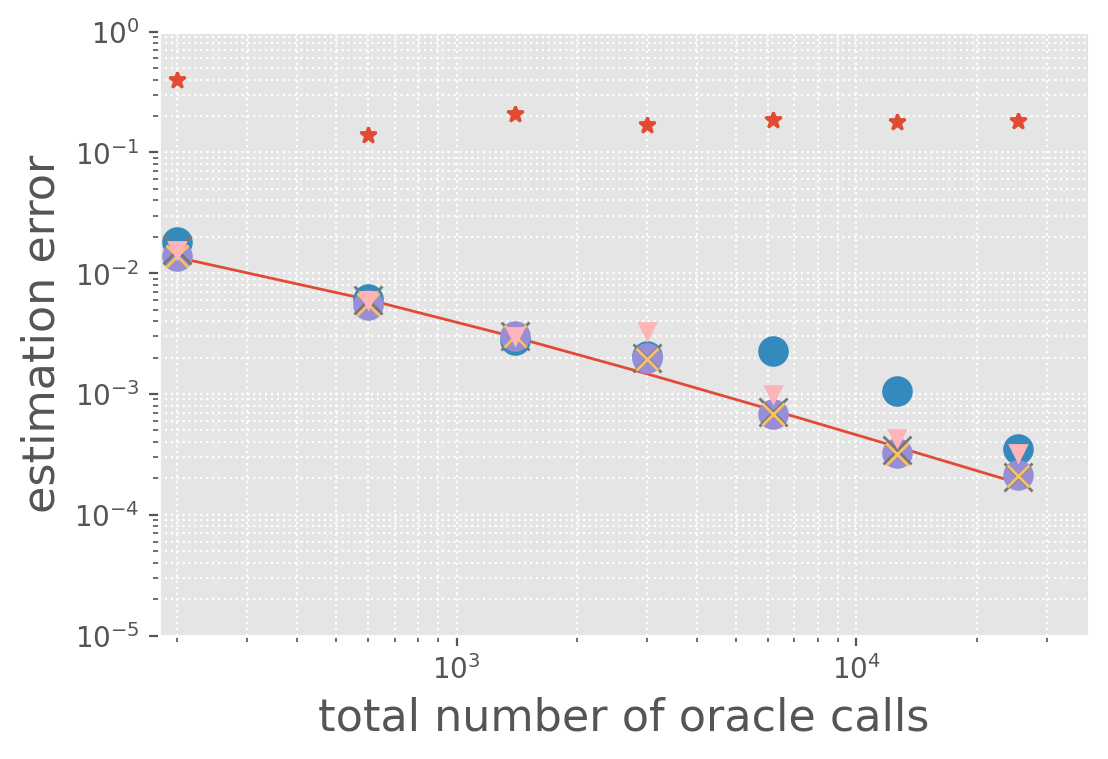

In [18]:
plt.clf()
plt.figure(dpi=200)
plt.style.use('ggplot')
p_theoretical = plt.loglog( OracleCall_list, ErrorCramérRao_list, color='C0', lw=1)
p_raw = plt.loglog( OracleCall_list, error_raw_list, 'o', color='C1', markersize=10)
p_ignis = plt.loglog( OracleCall_list, error_ignis_list, 'o', color='C2', markersize=10)
p_delta = plt.loglog( OracleCall_list, error_delta_list, 'x', color='C3', markersize=10)
p_lnp = plt.loglog( OracleCall_list, error_lnp_list, 'x', color='C4', markersize=8)
# p_mooney01 = plt.loglog( OracleCall_list, error_mooney01_list, 'v', color='C5', markersize=8)
p_mooney001 = plt.loglog( OracleCall_list, error_mooney001_list, 'v', color='C6', markersize=6)
# p_nation_lu = plt.loglog( OracleCall_list, error_nation_lu_list, '^', color='C7', markersize=6)
# p_nation_bicgstab = plt.loglog( OracleCall_list, error_nation_bicgstab_list, '^', color='C8', markersize=4)
p_mthree_lu = plt.loglog( OracleCall_list, error_mthree_lu_list, '*', color='C7', markersize=6)
# p_mthree_gmres = plt.loglog( OracleCall_list, error_mthree_gmres_list, '*', color='C8', markersize=4)


# plt.title(r"10-qubit, $b_{max}=1/2$, 100 shots, $p(0|1)=p(1|0)=0.01$")
plt.xlim(OracleCall_list[0]*0.9, OracleCall_list[-1]*1.5)
plt.xlabel("total number of oracle calls", fontsize=16)
plt.ylim(0.00001, 1)
plt.ylabel("estimation error", fontsize=16)
plt.grid(True, which="both", ls="dotted")